# Session executions table

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Numerical-data" data-toc-modified-id="Numerical-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerical data</a></span><ul class="toc-item"><li><span><a href="#Summary-statistics" data-toc-modified-id="Summary-statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Summary statistics</a></span></li><li><span><a href="#Normal-distribution-evaluation" data-toc-modified-id="Normal-distribution-evaluation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Normal distribution evaluation</a></span></li><li><span><a href="#Data-distribution-evaluation" data-toc-modified-id="Data-distribution-evaluation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data distribution evaluation</a></span></li><li><span><a href="#Outliers-detection" data-toc-modified-id="Outliers-detection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Outliers detection</a></span></li></ul></li><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Categorical variables</a></span></li></ul></div>

## Introduction

In this document there will be statistical analysis of Session_executions table. 
Session_executions table has 16 variables (columns) and 738688 records. 
There are a lot of missing data.
For the analysis below libraries will be used:

* pandas
* numpy
* statistics
* matplotlib.pyplot
* seaborn
* pingouin
* distfit

Below there are information and glimpse of this dataset. 

In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pingouin as pg
import statsmodels.api as sm
import matplotlib as mpl
from scipy import stats
from distfit import distfit

session_executions = pd.read_csv('C:/Users/admin/Desktop/mhunters/session_executions.csv', on_bad_lines='skip', low_memory=False, header = None, na_values = "\\N")
session_executions.columns = ['id', 'scheduled_at', 'user_program_id', 
                              'difficulty_feedback', 'enjoyment_feedback',
                             'feedback_comment', 'reps_executed',
                             'execution_time', 'order', 'created_at',
                             'updated_at', 'front_end_id', 'session_id',
                             'discarded', 'discard_reason', 'imported']

pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["image.cmap"] = "Pastel2"

C:\Users\admin\anaconda\envs\mhunters\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
session_executions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738688 entries, 0 to 738687
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   738688 non-null  int64  
 1   scheduled_at         0 non-null       float64
 2   user_program_id      738688 non-null  int64  
 3   difficulty_feedback  597620 non-null  float64
 4   enjoyment_feedback   597626 non-null  float64
 5   feedback_comment     0 non-null       float64
 6   reps_executed        732862 non-null  float64
 7   execution_time       682258 non-null  float64
 8   order                0 non-null       float64
 9   created_at           738688 non-null  object 
 10  updated_at           738688 non-null  object 
 11  front_end_id         0 non-null       float64
 12  session_id           738688 non-null  int64  
 13  discarded            738688 non-null  object 
 14  discard_reason       4621 non-null    float64
 15  imported         

In [3]:
session_executions.head()

,id,scheduled_at,user_program_id,difficulty_feedback,enjoyment_feedback,feedback_comment,reps_executed,execution_time,order,created_at,updated_at,front_end_id,session_id,discarded,discard_reason,imported
0,4201,NaN,2016,7.00,4.00,NaN,600.00,NaN,NaN,2021-08-11 11:36:19.323204,2021-08-11 11:36:19.785554,NaN,659,f,NaN,f
1,4283,NaN,2272,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-30 08:25:17.488913,2021-08-30 08:25:17.488913,NaN,536,t,4.00,f
2,4399,NaN,2393,4.00,3.00,NaN,144.00,NaN,NaN,2021-09-10 06:31:18.708608,2021-09-10 06:31:18.888265,NaN,692,f,NaN,f
3,4850,NaN,2791,7.00,5.00,NaN,576.00,NaN,NaN,2021-09-29 08:00:27.051064,2021-09-29 08:00:27.507686,NaN,644,f,NaN,f
4,4672,NaN,2447,5.00,3.00,NaN,174.00,NaN,NaN,2021-09-21 08:30:05.543407,2021-09-21 08:30:05.658811,NaN,691,f,NaN,f


Columns

* *scheduled_at*,
* *feedback_comment*,
* *order*,
* *created_at*, *updated_at*,
* *front_end_id*,
* *imported*

will be dropped, because they won't be important for the analysis. For the analysis variables taken into consideration are:

* *user_program_id* - ID number of user_program from *user_programs* table,
* *difficulty_feedback* - feedback of difficulty of completed program (on scale 1 to 10),
* *enjoyment_feedback* - feedback of enjoyment of completed program (on scale 1 to 10), **ask about enjoyment scale**
* *reps_executed* - how many reps were done during program,
* *execution_time* - how many seconds **(?)** were spent doing exercises only with time values,
* *session_id* - ID number of session,
* *discarded* - was a session discarded (true/false),
* *discard_reason* - **supposed to be a legend for it here**.

The information and glimpse of reduced data are given below.

In [4]:
session_executions2 = session_executions.drop(['scheduled_at', 'feedback_comment',
                                              'order', 'created_at', 'updated_at',
                                              'front_end_id', 'imported'], axis = 1)

session_executions2.replace('t', 'True', inplace = True)
session_executions2.replace('f', 'False', inplace = True)

session_executions2['discarded'] = session_executions2['discarded'].astype('category')
session_executions2['discard_reason'] = session_executions2['discard_reason'].astype('category')


In [5]:
session_executions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738688 entries, 0 to 738687
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   738688 non-null  int64   
 1   user_program_id      738688 non-null  int64   
 2   difficulty_feedback  597620 non-null  float64 
 3   enjoyment_feedback   597626 non-null  float64 
 4   reps_executed        732862 non-null  float64 
 5   execution_time       682258 non-null  float64 
 6   session_id           738688 non-null  int64   
 7   discarded            738688 non-null  category
 8   discard_reason       4621 non-null    category
dtypes: category(2), float64(4), int64(3)
memory usage: 40.9 MB


In [6]:
session_executions2.head()

,id,user_program_id,difficulty_feedback,enjoyment_feedback,reps_executed,execution_time,session_id,discarded,discard_reason
0,4201,2016,7.00,4.00,600.00,NaN,659,False,NaN
1,4283,2272,NaN,NaN,NaN,NaN,536,True,4.00
2,4399,2393,4.00,3.00,144.00,NaN,692,False,NaN
3,4850,2791,7.00,5.00,576.00,NaN,644,False,NaN
4,4672,2447,5.00,3.00,174.00,NaN,691,False,NaN


On difficulty feedback there are 597620 (81%) observations, enjoyment feedback has 597626 (81%) observations. Variable reps executed has 732862 (99%) observations, execution time has 682258 (92%) observations and discarded reason has 4621 (less than 0.05%).

## Numerical data

Numerical variables taken into consideration are:

* *difficulty_feedback*,
* *enjoyment_feedback*,
* *reps_executed* and
* *execution_time*.

### Summary statistics

Below there is summary statistics about this variable that contains mean, standard deviation, minimum, maximum, quartiles, variance, skewness, kurtosis and NULL count.

In [7]:
num_t = session_executions2.loc[:, ['difficulty_feedback', 'enjoyment_feedback', 'reps_executed', 'execution_time']]
num_t_desc = num_t.describe()
num_t_desc = num_t_desc.transpose()
num_t_desc["var"] = num_t.var()
num_t_desc["skewness"] = num_t.skew()
num_t_desc["kurtosis"] = num_t.kurtosis()
num_t_desc["NULL count"] = num_t.isna().sum()
num_t_desc

,count,mean,std,min,25%,50%,75%,max,var,skewness,kurtosis,NULL count
difficulty_feedback,597620.00,5.50,2.31,1.00,5.00,5.00,5.00,10.00,5.33,0.54,0.60,141068
enjoyment_feedback,597626.00,3.56,1.02,1.00,3.00,3.00,5.00,5.00,1.05,0.21,-0.46,141062
reps_executed,732862.00,3601.83,2481357.56,-3.00,0.00,126.00,244.00,2111101353.00,6157135336092.50,841.17,714986.40,5826
execution_time,682258.00,1059.93,1727.98,0.00,0.00,811.00,1463.00,86340.00,2985898.22,11.95,358.22,56430


For *difficulty_feedback* variable mean value is 5.5 (SD 2.3), median is 5 (IQR 5 - 5) and maximum value is 10. For *enjoyment_feedback* variable mean value is 3.6 (SD 1), median is 3 (IQR  3 - 5) and maximum is 5. For *reps_executed* variables there are outliers, because the minimum value is -3 reps and maximum is 2111101353 reps executed. Mean value is 3602 (SD 2481358), median is 126 (IQR 0 - 244). For *execution_time* variable mean is 1059 seconds (SD 1728), median is 811 seconds per block (IQR 0 - 1463) and maximum is 86340 seconds. 

Difficulty feedback and enjoyment feedback can be also considered as categorical variables. It will be done in the Categorical variables section.

Below there is a barplot with NULL count of numeric data.

In [8]:
num_null_counts = []
num_no_null_counts = []

for col in num_t.columns:
    num_null_counts.append(num_t[col].isnull().sum())
    num_no_null_counts.append(len(num_t[col]) - num_t[col].isnull().sum())

null_c = {
    'True': num_null_counts,
    'False': num_no_null_counts
}

null_counts = pd.DataFrame(null_c)
null_counts.set_index(num_t.columns, inplace = True)


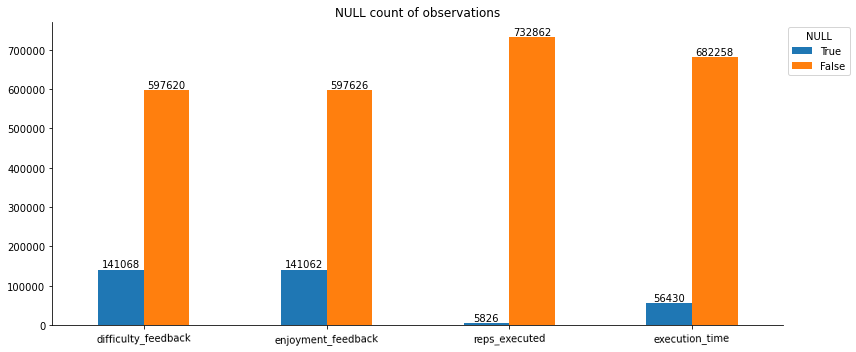

In [9]:
ax = null_counts.plot.bar(rot=1, figsize = (12,5), title = 'NULL count of observations')

# ax.tick_params(axis='x', labelrotation = 90)

for c, col in zip(ax.containers, null_counts.columns):
    ax.bar_label(c, label_type='edge', labels=[f'{val}' for val in null_counts[col]])

ax.legend(title='NULL', bbox_to_anchor=(1, 1), loc='upper left')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

### Normal distribution evaluation

In this section, the normal distribution evaluation will be done. For this purpose, there will be histogram, qqplot and Shapiro-Wilk test done. Below there are histograms.

Text(0.5, 0.98, 'Histogram for numeric variables')

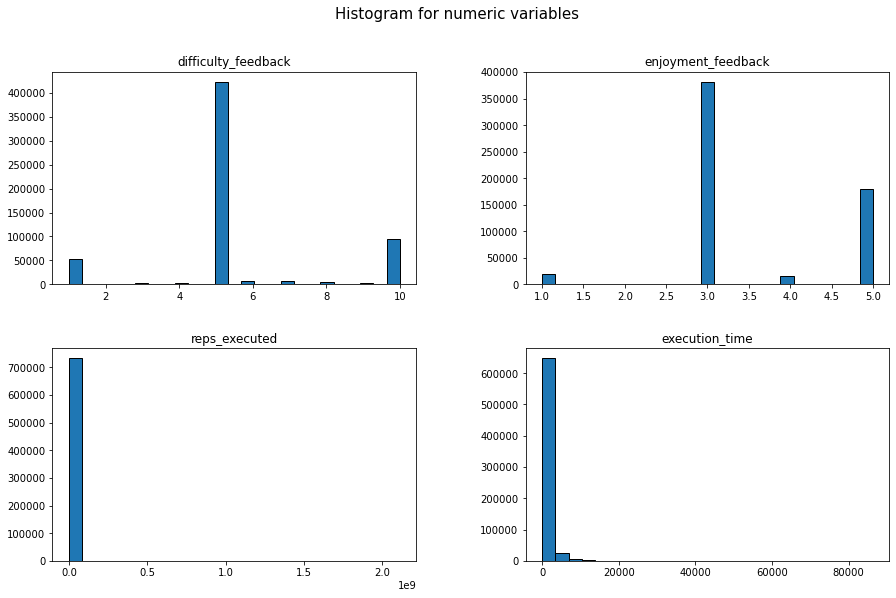

In [10]:
num_t.hist(layout=(2,2), grid = False, bins = 25, edgecolor='black', figsize=(15,9))
plt.suptitle('Histogram for numeric variables', fontsize = 15)

Below there are qqplots.

Text(0.5, 1.05, 'QQ plots for numeric variables')

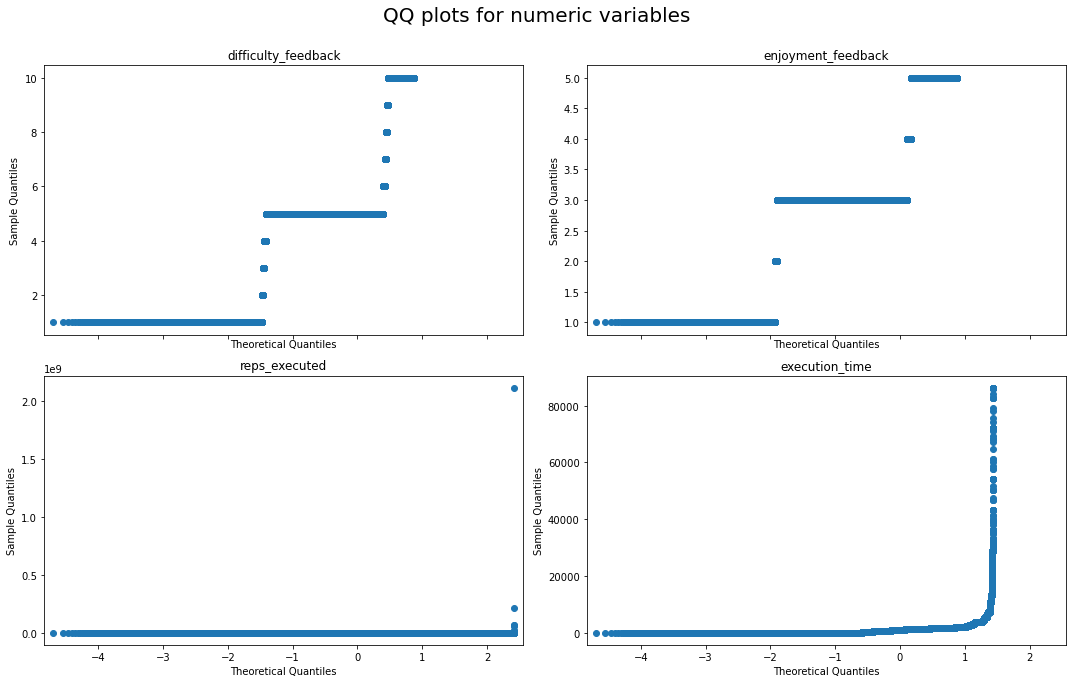

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, figsize=(15,9))
for k, ax in zip(num_t.columns, np.ravel(axes)):

        sm.qqplot(num_t[k], line='s', ax=ax)
        ax.set_title(f'{k}')
plt.tight_layout()
plt.suptitle('QQ plots for numeric variables', fontsize = 20, y = 1.05)

And last, but not least, below there is the table with Shapiro-Wilk test statistics.

In [12]:
normal = pg.normality(num_t, method='shapiro').round(3)
normal.transpose()

,difficulty_feedback,enjoyment_feedback,reps_executed,execution_time
W,0.70,0.70,0.00,0.49
pval,0.00,0.00,0.00,0.00
normal,False,False,False,False


There is no normality in the data (histograms, qqplots, Shapiro-Wilk test statistics, kurtosis and skewness confirmes it).

### Data distribution evaluation

In this section, data distribution will be checked (or the closest one). The criterion of determination for best fit is RSS (residual sum of squares). The RSS describes the deviation predicted from actual empirical values of data. For this operation, NULL values have to be deleted.

* *difficulty_feedback* - the best distribution is *t* distribution (RSS = 10.14), then *dweibull* (RSS = 11.93), *lognorm* (RSS = 15.7), *beta* (RSS = 15.71) and gamma (RSS = 15.71).

[distfit] >fit..
[distfit] >transform..
[distfit] >[t       ] [27.6 sec] [RSS: 10.1385] [loc=5.001 scale=0.003]
[distfit] >[dweibull] [46.5 sec] [RSS: 11.9317] [loc=5.000 scale=1.149]
[distfit] >[lognorm ] [26.8 sec] [RSS: 15.7027] [loc=-12.598 scale=17.953]
[distfit] >[beta    ] [18.6 sec] [RSS: 15.7085] [loc=-7.799 scale=58082552.027]
[distfit] >[gamma   ] [9.64 sec] [RSS: 15.7085] [loc=-7.799 scale=0.396]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: t'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

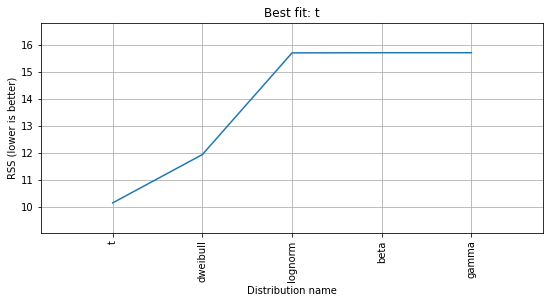

In [15]:
num_t2 = num_t['difficulty_feedback'].dropna()
dif_fed = num_t2.values
dist = distfit(distr = ['t', 'dweibull', 'lognorm', 'beta', 'gamma'])
dist.fit_transform(dif_fed)
#dist.summary # there can be also dist.plot() and it gives the plot of distribution 
dist.plot_summary(figsize = (9,4))

* *enjoyment_feedback* - the best fitting distribution is *beta* (RSS = 68.69), then *dweibull* (RSS = 69.21), *lognorm* (RSS = 74.38), *gamma* (RSS = 74.39) and *genextreme* (RSS = 74.52).

[distfit] >fit..
[distfit] >transform..
[distfit] >[beta      ] [36.3 sec] [RSS: 68.6935] [loc=0.957 scale=4.043]
[distfit] >[dweibull  ] [46.9 sec] [RSS: 69.2073] [loc=3.000 scale=1.100]
[distfit] >[lognorm   ] [29.7 sec] [RSS: 74.3774] [loc=-9.644 scale=13.161]
[distfit] >[gamma     ] [7.63 sec] [RSS: 74.3886] [loc=-5.805 scale=0.112]
[distfit] >[genextreme] [22.3 sec] [RSS: 74.5244] [loc=3.207 scale=1.005]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: beta'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

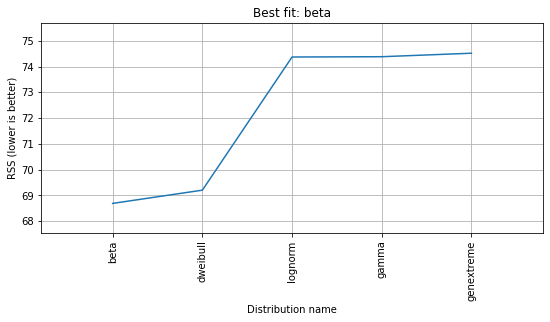

In [19]:
num_t2 = num_t['enjoyment_feedback'].dropna()
dif_fed = num_t2.values
dist = distfit(distr = ['beta', 'dweibull', 'lognorm', 'gamma', 'genextreme'])
dist.fit_transform(dif_fed)
#dist.summary # there can be also dist.plot() and it gives the plot of distribution 
dist.plot_summary(figsize = (9,4))

* *reps_executed* - the best fitting distribution is *dweibull* (RSS < 0.0005), then *genextreme* (RSS < 0.0005), *uniform* (RSS < 0.0005), *pareto* (RSS < 0.0005) and *t* (RSS < 0.0005).

[distfit] >fit..
[distfit] >transform..
[distfit] >[dweibull  ] [52.8 sec] [RSS: 4.80787e-16] [loc=0.000 scale=2303252.730]
[distfit] >[genextreme] [111. sec] [RSS: 5.39398e-16] [loc=3.227 scale=17.553]
[distfit] >[uniform   ] [0.0 sec] [RSS: 5.4972e-16] [loc=-3.000 scale=2111101356.000]
[distfit] >[pareto    ] [49.1 sec] [RSS: 5.59141e-16] [loc=-2.582 scale=2.362]
[distfit] >[t         ] [28.9 sec] [RSS: 5.60072e-16] [loc=0.000 scale=0.000]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: dweibull'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

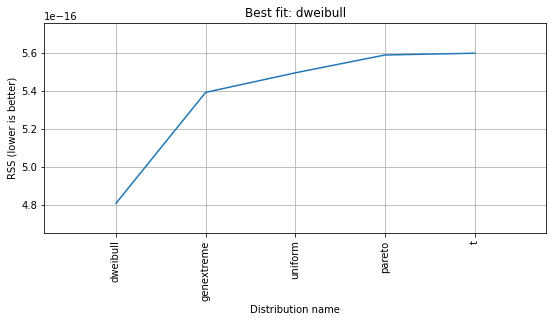

In [20]:
num_t2 = num_t['reps_executed'].dropna()
dif_fed = num_t2.values
dist = distfit(distr = ['dweibull', 'genextreme', 'uniform', 'pareto', 't'])
dist.fit_transform(dif_fed)
#dist.summary # there can be also dist.plot() and it gives the plot of distribution 
dist.plot_summary(figsize = (9,4))

* *execution_time* - the best fitting distribution is *dweibull* (RSS = 0.0000000006), then *exponential* (RSS = 0.000000007), *beta* (RSS = 0.00000005), *normal* (RSS = 0.00000008) and *logarythmic gamma* (RSS = 0.0000001).

[distfit] >fit..
[distfit] >transform..
[distfit] >[dweibull] [21.7 sec] [RSS: 6.27233e-10] [loc=803.509 scale=890.918]
[distfit] >[expon   ] [0.0 sec] [RSS: 6.64466e-09] [loc=0.000 scale=1059.933]
[distfit] >[beta    ] [54.7 sec] [RSS: 5.41691e-08] [loc=-0.000 scale=101361.869]
[distfit] >[norm    ] [0.01 sec] [RSS: 8.10511e-08] [loc=1059.933 scale=1727.974]
[distfit] >[loggamma] [27.4 sec] [RSS: 9.84147e-08] [loc=-763766.676 scale=98309.276]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot summary..


(<Figure size 648x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: dweibull'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

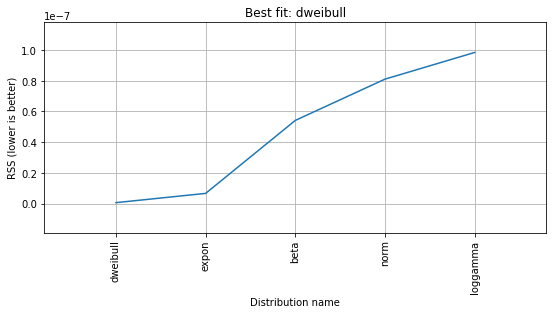

In [21]:
num_t2 = num_t['execution_time'].dropna()
dif_fed = num_t2.values
dist = distfit(distr = ['dweibull', 'expon', 'beta', 'norm', 'loggamma'])
dist.fit_transform(dif_fed)
#dist.summary # there can be also dist.plot() and it gives the plot of distribution 
dist.plot_summary(figsize = (9,4))

### Outliers detection

The outliers detection will be done as soon as definition of an outlier will be specified.

## Categorical variables

Categorical variables can be not only

* *discarded*,
* *discard_reason*

but also

* *difficulty_feedback* and
* *enjoyment_feedback*.

In [18]:
session_executions2['difficulty_feedback'] = session_executions2['difficulty_feedback'].astype('category')
session_executions2['enjoyment_feedback'] = session_executions2['enjoyment_feedback'].astype('category')

In [22]:
def my_freq_table(data, var, sort = True, cumul_percent = False):
    myFreqTable = data[var].value_counts()
    myFreqTable = pd.DataFrame({var: myFreqTable.keys(), 'Frequency': myFreqTable.values})
    myFreqTable = myFreqTable.astype({'Frequency': 'int32'})
    
    if sort == True:
        myFreqTable = myFreqTable.sort_values(by=[var])
        myFreqTable = myFreqTable.reset_index(drop=True)
    
    myFreqTable['Percent'] = myFreqTable['Frequency']/myFreqTable['Frequency'].sum()*100
    
    sum_row1 = myFreqTable['Frequency'].sum()
    sum_row2 = myFreqTable['Percent'].sum()
    sum_row2 = sum_row2.round(2).astype('str') + '%'
    
    myFreqTable['Percent'] = myFreqTable['Percent'].round(2).astype('str') + '%'
    
    if cumul_percent == True:
        myFreqTable['Cumulative Percent'] = myFreqTable['Frequency'].cumsum() / myFreqTable['Frequency'].sum() * 100
        myFreqTable['Cumulative Percent'] = myFreqTable['Cumulative Percent'].round(2).astype('str') + '%'
        sum_row_c = '-'
    
    '''
    if valid_percent == True:
    
        myMissingCategory = [np.NaN]

        myFreqTable2 = myFreqTable
        isNonmisAr = np.array([])

        for i in data[var]:
            isNotMissing=1
            for j in myMissingCategory:
                if i==j:
                    isNotMissing=0
            isNonmisAr = np.append(isNonmisAr, [isNotMissing])
        
        validSum = sum(myFreqTable2['Frequency']*isNonmisAr)
        validPerc = myFreqTable2['Frequency']/validSum*isNonmisAr*100
        
        for i in range(len(validPerc)):
            if isNonmisAr[i]==0:
                validPerc[i]=np.nan
        
        myFreqTable2['Valid Percent'] = validPerc
        
        if cumul_percent == True:
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Valid Percent'].cumsum()
            
            sum_c_2 = '-'
            
            myFreqTable2['Cumulative Valid Percent'] = myFreqTable2['Cumulative Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = myFreqTable2['Valid Percent'].sum()
        
        myFreqTable2['Valid Percent'] = myFreqTable2['Valid Percent'].round(2).astype('str') + '%'
        
        sum_valid_percent = sum_valid_percent.round(2).astype('str') + '%'
        
        #myFreqTable2 = myFreqTable2.set_index(var)
        
        # return(myFreqTable2)
    
       
    if (valid_percent == True) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c, 
                    'Valid Percent': sum_valid_percent,
                    'Cumulative Valid Percent': sum_c_2}
        
    elif (valid_percent == False) and (cumul_percent == True):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
        
    elif (valid_percent == True) and (cumul_percent == False):
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2,
                    'Valid Percent': sum_valid_percent}
            
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    if valid_percent == True:
        myFreqTable = myFreqTable2
    '''
    
    if cumul_percent == True:
        new_rows = {'Frequency': sum_row1, 'Percent': sum_row2, 
                    'Cumulative Percent': sum_row_c}
    else: new_rows = {'Frequency': sum_row1, 'Percent': sum_row2}
    
    myFreqTable = myFreqTable.append(new_rows, ignore_index=True)
    cats = data[var].cat.add_categories(['Total'])
    myFreqTable.set_index(cats.cat.categories, inplace = True)
    
    cols = myFreqTable.columns
    
    for col in cols:
        if col == var:
            myFreqTable = myFreqTable.drop(var, axis = 1)
    #myFreqTable.rename(index = {'NaN': 'Total'}, inplace = True)
    
    return(myFreqTable)
    

In [23]:
discarded = my_freq_table(session_executions2, var = 'discarded', cumul_percent = True)
discard_reason = my_freq_table(session_executions2, var = 'discard_reason', cumul_percent = True)
enjoyment_feedback = my_freq_table(session_executions2, var = 'enjoyment_feedback', cumul_percent = True)
difficulty_feedback = my_freq_table(session_executions2, var = 'difficulty_feedback', cumul_percent = True)

In [27]:
empty_row = pd.DataFrame([''])
freq_cat_together = pd.concat([discarded,empty_row, discard_reason,empty_row, enjoyment_feedback,empty_row,
                               difficulty_feedback], axis = 0)
freq_cat_together = freq_cat_together.reset_index()


freq_cat_together.insert(0, 'Variable', value=['' for i in range(freq_cat_together.shape[0])])
freq_cat_together = freq_cat_together.iloc[: , :-1]
freq_cat_together.loc[-1] = ['Dicarded', '', '','','']  # adding a row
freq_cat_together.index = freq_cat_together.index + 1  # shifting index

freq_cat_together = freq_cat_together.sort_index() 

freq_cat_together.loc[4] =  ['Discard_reason', '', '', '', '']
freq_cat_together.loc[11] =  ['enjoyment_feedback', '', '', '', '']
freq_cat_together.loc[18] =  ['difficulty_feedback', '', '', '', '']
freq_cat_together.rename(columns = {'index': 'factors'}, inplace = True)
freq_cat_together.set_index(['Variable', 'factors'], inplace=True)


freq_cat_together


Frequency Percent Cumulative Percent
Variable            factors                                     
Dicarded                                                        
                    False   734067.00  99.37%             99.37%
                    True      4621.00   0.63%             100.0%
                    Total   738688.00  100.0%                  -
Discard_reason                                                  
                    0.0        298.00   6.45%              6.45%
                    1.0        198.00   4.28%             10.73%
                    2.0        347.00   7.51%             18.24%
                    3.0        369.00   7.99%             26.23%
                    4.0       3409.00  73.77%             100.0%
                    Total     4621.00  100.0%                  -
enjoyment_feedback                                              
                    1.0      20014.00   3.35%              3.35%
                    2.0        998.00   0.17%              3.52%
                    3.0     381827.00  63.89%             67.41%
                    4.0      15732.00   2.63%             70.04%
                    5.0     179055.00  29.96%             100.0%
                    Total   597626.00  100.0%                  -
difficulty_feedback                                             
                    1.0      52418.00   8.77%              8.77%
                    2.0        623.00    0.1%              8.88%
                    3.0       2079.00   0.35%              9.22%
                    4.0       2869.00   0.48%               9.7%
                    5.0     423691.00   70.9%              80.6%
                    6.0       7788.00    1.3%              81.9%
                    7.0       7419.00   1.24%             83.14%
                    8.0       3857.00   0.65%             83.79%
                    9.0       1831.00   0.31%              84.1%
                    10.0     95045.00   15.9%             100.0%
                    Total   597620.00  100.0%                  -

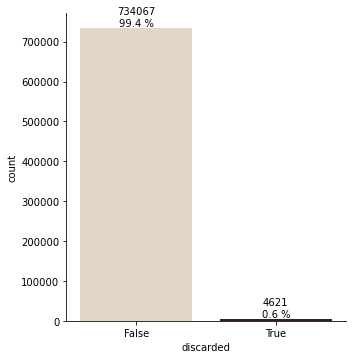

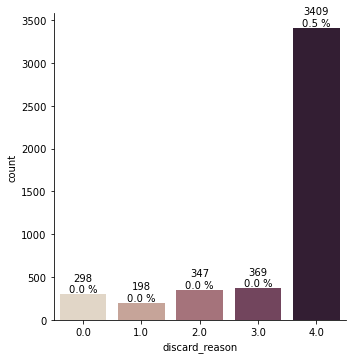

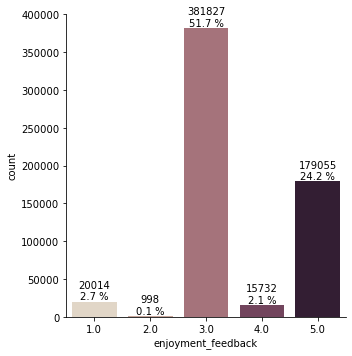

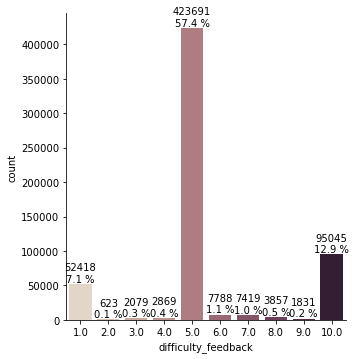

In [28]:
total = len(session_executions2)
g = sns.catplot(data=session_executions2, x='discarded', kind="count", palette="ch:.25")
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g = sns.catplot(data=session_executions2, x='discard_reason', kind="count", palette="ch:.25")

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
g = sns.catplot(data=session_executions2, x='enjoyment_feedback', kind="count", palette="ch:.25")

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

g = sns.catplot(data=session_executions2, x='difficulty_feedback', kind="count", palette="ch:.25")

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{v.get_height()}\n{v.get_height()/total * 100.0:.1f} %' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

    

There were 4621 (0.6%) discarded sessions, in which 298 (6%) were reason **0**, 198 (4%) were reason **1**, 347 (8%) were reason **2**, 369 (8%) were reason **3** and 3409 (74%) were reason **4**. Enjoyment feedback 1 were given 20014 (3%) times, 2 were given 998 (0.17%) times, 3 were given 381827 (64%) times, 4 were given 15732 times (3%) and 5 were given 179055 (30%) times. On difficulty feedback, the most frequent answer was 5 - 423691 (71%) times, then answer 10 - 95045 (16%) times and answer 1 - 52418 (9%) times.